## Мотивация: Математическая формулировка задачи ML

$(x_i,y_i)$ - обучающая выборка ($x_i$ - вектор, $y_i$ - число)  
$f(x)$ - классификатор/регрессор  
$L(y_{pred}, y_{real})$ - функция потерь  
#### Задача
$$\min_f\sum_iL(f(x_i),y_i)$$
#### Конкретная задача 
Линейная регрессия:  
<img src="./images/regres1.gif" alt="Drawing" style="height: 150px;"/>
$x_i$ - число  
$y_i$ - число  
$f(x) = \alpha x$  
$L(y_{pred}, y_{real}) = (y_{pred} - y_{real})^2$


$$\min_\alpha\sum_i(\alpha x_i - y_i)^2$$

Как решать?  
Как в школе - находим производную, приравниваем к нулю.
$$(\sum_i(\alpha x_i - y_i)^2)'_{alpha} = (\sum_i(\alpha^2 x_i^2 - 2\alpha_ix_iy_i + y_i^2))'_{alpha}= \sum_i(\alpha^2 x_i^2 - 2\alpha_ix_iy_i + y_i^2)'_{alpha} =  $$
$$ = \sum_i(\alpha^2 x_i^2 - 2\alpha_ix_iy_i + y_i^2)'_{alpha} = \sum_i(2\alpha x_i^2 - 2x_iy_i) = 2\alpha\sum_i x_i^2 - 2\sum_i x_iy_i $$
$$2\alpha\sum_i x_i^2 - 2\sum_i x_iy_i = 0$$
$$\alpha = \frac{\sum_i x_iy_i}{\sum_i x_i^2}$$
Решили задачу, нашли идеальную $f(x)$

В нейроночках всё примерно так же. Тоже нужна производная (градиент).

Мораль:
1. Задача обучения - задача оптимизации
2. Для того, чтобы модель обучалась, нужно уметь вычислять градиент оптимизируемой функции

## Sequential модели 
Как сделать сети так, чтобы можно было не мучаться с нахождением производных, но сохранить разнообразие?
<img src="./images/seq_model.png" alt="Drawing" style="height: 400px;"/>
Представляем сеть как последовательность слоёв. В таком случае мы можем описать вывод сети как
$$f(x) = Out(Dense(MP(Conv(Emb(x)))))$$
Где $Out(x)$ - предиктор подсети output слоя, $Dense(x)$ - предиктор подсети dense слоя и т.д.

Такая схема нам помогает, поскольку производные сложных функций мы считать умеем
$$f'(x) = Out'(Dense(MP(Conv(Emb(x)))))\cdot Dense'(MP(Conv(Emb(x)))) \cdot MP'(Conv(Emb(x))) \cdot Conv'(Emb(x)) \cdot Emb'(x)$$


### Слои

In [2]:
import keras
from keras.layers import Dense, Embedding, Convolution1D, BatchNormalization, Dropout, Input, GlobalMaxPooling1D

Using TensorFlow backend.


Fully connected слой (он же Dense) - Каждый нейрон соединён с каждым

In [4]:
Dense(100500, activation='relu')

BatchNorm - Нормализует вход, т.е. делает среднее нулём и дисперсию единицей
$$ X_{new} = \frac {X - \bar X} { \sigma_x}$$

In [5]:
BatchNormalization()

Dropout - случайно зануляет несколько выходов с прошлого слоя (нужно, чтобы предотвратить переобучение)
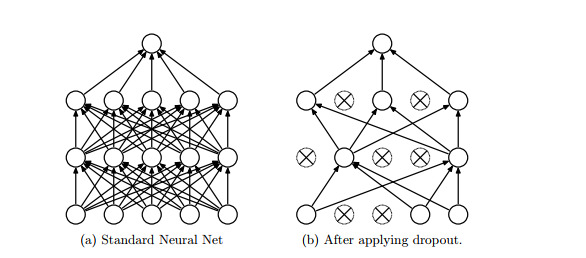

In [6]:
Dropout(0.2, seed=42)

Embedding - Применяется для обработки естественного языка.
Реализует word2vec - технику, при которой каждое слово заменяется числовым вектором так, чтобы близкие по смыслу или форме слова были достаточно близко друг к другу в векторном пространстве

In [7]:
Embedding(input_dim=5000, output_dim=50)

Соберём вышеприведённую сеть

In [59]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [60]:
print(X_train[0])
#каждое слово заменено номером

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [61]:
from keras.preprocessing import sequence

Расширяем последовательности, чтобы они были одинаковой длины

In [62]:
X_train = sequence.pad_sequences(X_train, maxlen=400)
X_test = sequence.pad_sequences(X_test, maxlen=400)

In [63]:
X_train.shape

(25000, 400)

In [72]:
input_layer = Input(shape=(400,))
input_layer

<tf.Tensor 'input_5:0' shape=(?, 400) dtype=float32>

In [73]:
emb_layer = Embedding(input_dim=5000, output_dim=50, input_length=400)(input_layer)
emb_do_layer = Dropout(0.2)(emb_layer)
emb_do_layer

<tf.Tensor 'dropout_11/cond/Merge:0' shape=(?, 400, 50) dtype=float32>

In [74]:
conv_layer = Convolution1D(filters=250, 
                           kernel_size=3,
                           activation='relu')(emb_do_layer)
conv_layer

<tf.Tensor 'conv1d_6/Relu:0' shape=(?, 398, 250) dtype=float32>

In [75]:
mp_layer = GlobalMaxPooling1D()(conv_layer)
mp_layer

<tf.Tensor 'global_max_pooling1d_6/Max:0' shape=(?, 250) dtype=float32>

In [76]:
dense_layer = Dense(250, activation='relu')(mp_layer)
dense_do_layer = Dropout(0.2)(dense_layer)
dense_do_layer

<tf.Tensor 'dropout_12/cond/Merge:0' shape=(?, 250) dtype=float32>

In [77]:
output_layer = Dense(1, activation='sigmoid')(dense_do_layer)
output_layer

<tf.Tensor 'dense_10/Sigmoid:0' shape=(?, 1) dtype=float32>

Все слои есть, осталось собрать модель

In [78]:
from keras.models import Model
model = Model(inputs=[input_layer], outputs=[output_layer])
model.compile(optimizer='ADAM', loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(X_train, y_train,epochs=4,validation_data=(X_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 41s - loss: 0.4044 - acc: 0.8036 - val_loss: 0.2797 - val_acc: 0.8830
Epoch 2/4
25000/25000 [==============================] - 41s - loss: 0.2407 - acc: 0.9026 - val_loss: 0.2657 - val_acc: 0.8894
Epoch 3/4
25000/25000 [==============================] - 41s - loss: 0.1703 - acc: 0.9352 - val_loss: 0.3078 - val_acc: 0.8762
Epoch 4/4
25000/25000 [==============================] - 41s - loss: 0.1171 - acc: 0.9568 - val_loss: 0.3083 - val_acc: 0.8856


Оригинал: http://www.samyzaf.com/ML/imdb/imdb.html
